In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


## Data Load

In [2]:
import pandas as pd

In [3]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')
sample_submission

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5
...,...,...
39093,97738,0.5
39094,97739,0.5
39095,97740,0.5
39096,97741,0.5


In [4]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
train_df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [5]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
test_df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
train_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [8]:
train_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [9]:
train_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [10]:
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Target Imbalance

<Axes: xlabel='loan_status', ylabel='Density'>

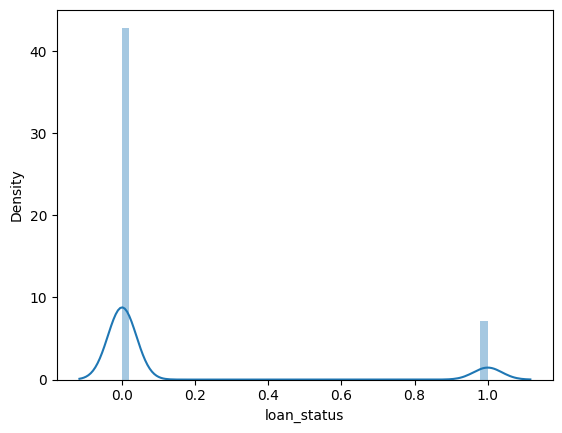

In [11]:
sns.distplot(train_df['loan_status'])

In [12]:
train_df.loan_status.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

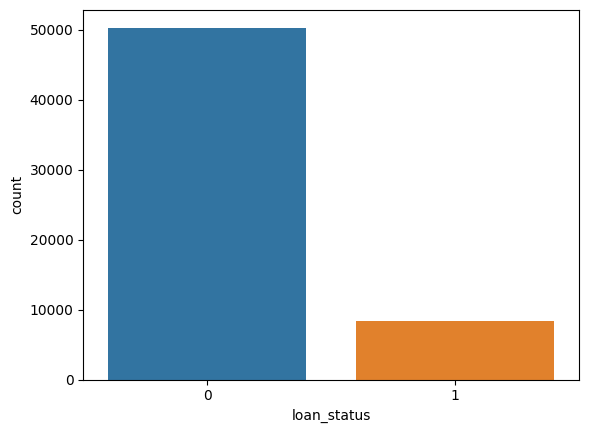

In [13]:
sns.countplot(data= train_df, x='loan_status')

In [103]:
50295/8350

6.023353293413174

## Data Exploration

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline


 id
id
0        1
1        1
2        1
3        1
4        1
        ..
58640    1
58641    1
58642    1
58643    1
58644    1
Name: count, Length: 58645, dtype: int64


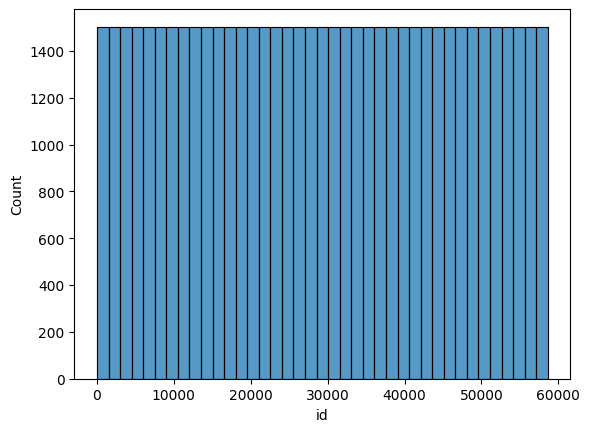


 person_age
person_age
20       12
21     1795
22     7051
23     7726
24     6395
25     5067
26     3874
27     4450
28     3707
29     3270
30     2333
31     1917
32     1565
33     1306
34     1041
35      862
36     1117
37      992
38      745
39      536
40      438
41      433
42      291
43      320
44      229
45      163
46      164
47      125
48       97
49       59
50       63
51       69
52       62
53       75
54       60
55       34
56       29
57       25
58       35
59        6
60       28
61       13
62        7
64       10
65       13
66       11
69        6
70       10
73        3
76        1
80        2
84        2
123       1
Name: count, dtype: int64


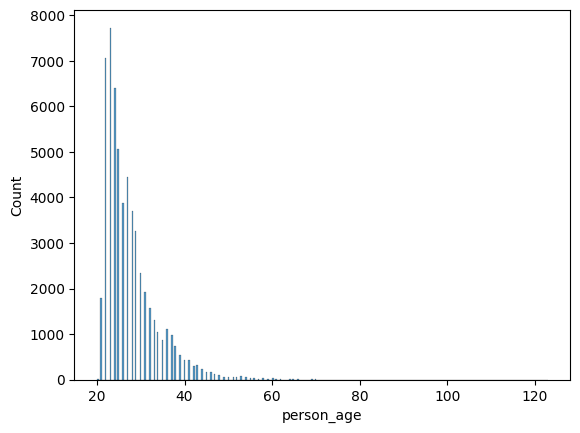


 person_income
person_income
4200        1
5000        1
9600       14
10000       1
10140       1
           ..
948000      1
1200000     2
1824000     1
1839784     1
1900000     1
Name: count, Length: 2641, dtype: int64


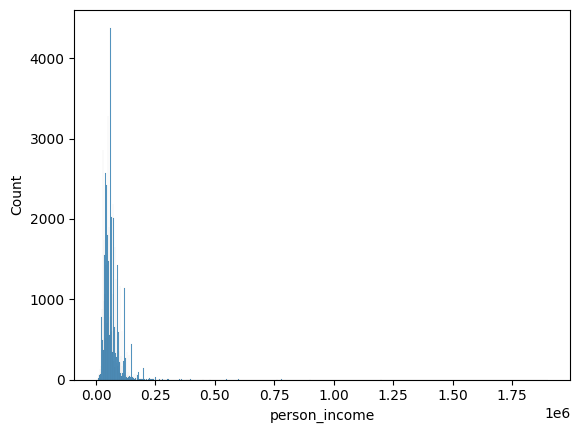


 person_home_ownership
person_home_ownership
MORTGAGE    24824
OTHER          89
OWN          3138
RENT        30594
Name: count, dtype: int64


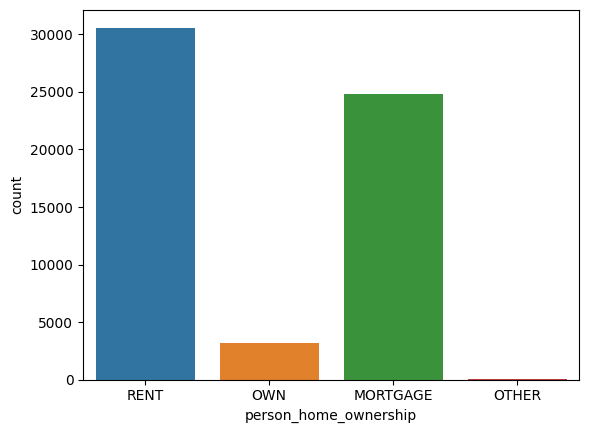


 person_emp_length
person_emp_length
0.0      7586
1.0      5203
2.0      7270
3.0      6475
4.0      5461
5.0      5839
6.0      4902
7.0      4275
8.0      3015
9.0      2290
10.0     1072
11.0     1491
12.0     1105
13.0      797
14.0      590
15.0      367
16.0      280
17.0      168
18.0      153
19.0       72
20.0       65
21.0       78
22.0       20
23.0       12
24.0       14
25.0        8
26.0       11
27.0        7
28.0        4
29.0        2
30.0        2
31.0        5
35.0        1
39.0        1
41.0        2
123.0       2
Name: count, dtype: int64


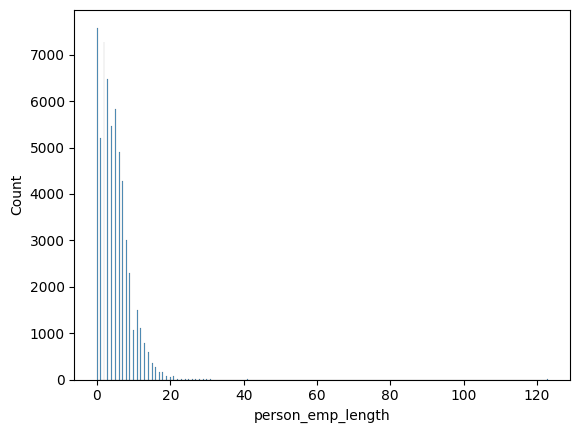


 loan_intent
loan_intent
DEBTCONSOLIDATION     9133
EDUCATION            12271
HOMEIMPROVEMENT       6280
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
Name: count, dtype: int64


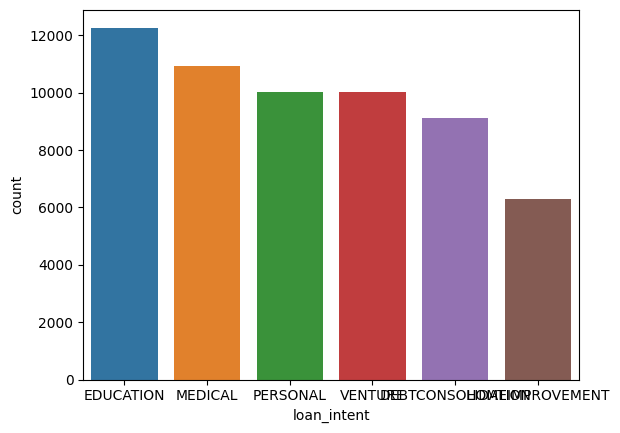


 loan_grade
loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64


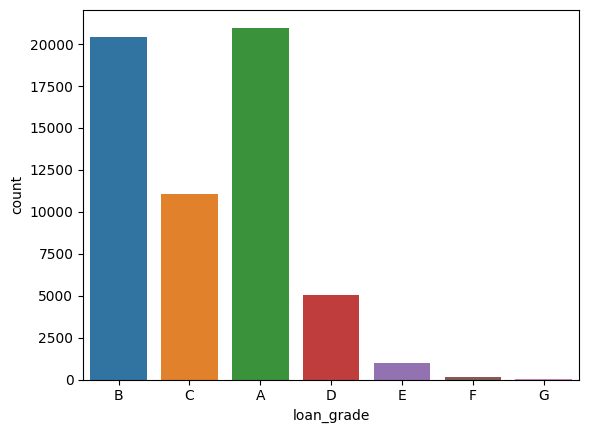


 loan_amnt
loan_amnt
500        1
700        1
900        1
1000     406
1050       2
        ... 
30750      1
31000      2
32000      1
33000      1
35000    155
Name: count, Length: 545, dtype: int64


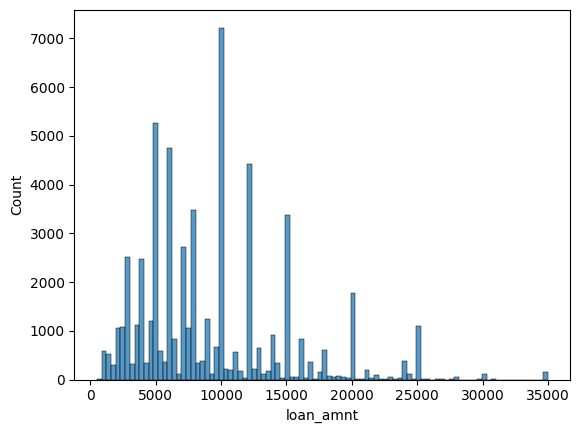


 loan_int_rate
loan_int_rate
5.42     1117
5.43        1
5.79      811
5.99      562
6.00        4
         ... 
21.74       4
22.06       1
22.11       1
23.06       1
23.22       1
Name: count, Length: 362, dtype: int64


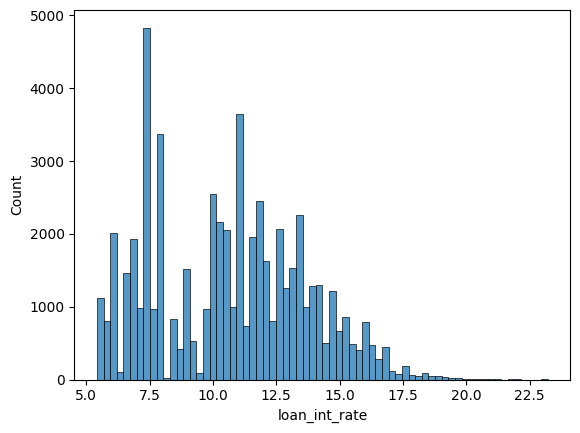


 loan_percent_income
loan_percent_income
0.00       2
0.01     138
0.02     423
0.03    1129
0.04    1689
        ... 
0.55       1
0.56       2
0.59       1
0.63       1
0.83       1
Name: count, Length: 61, dtype: int64


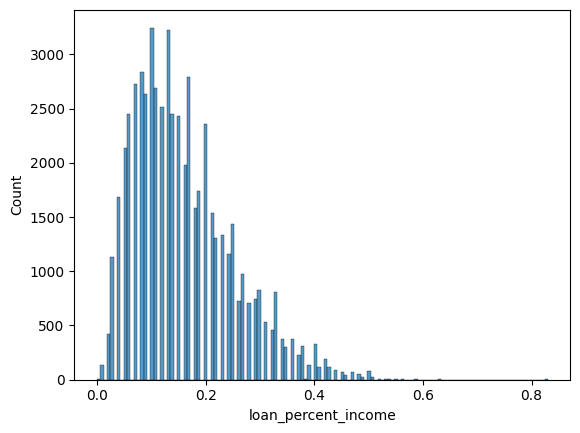


 cb_person_default_on_file
cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64


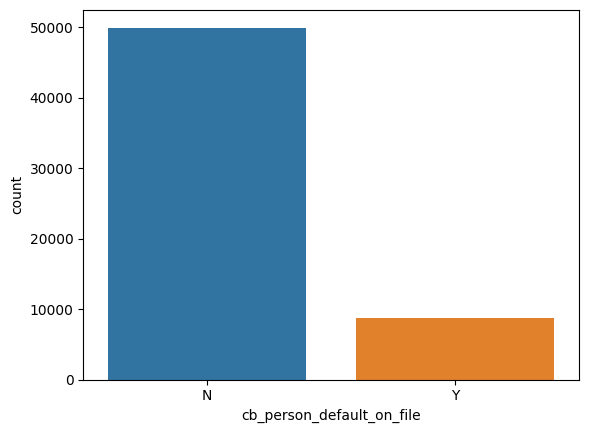


 cb_person_cred_hist_length
cb_person_cred_hist_length
2     10657
3     10708
4     10566
5      3345
6      3391
7      3392
8      3477
9      3499
10     3364
11      858
12      883
13      850
14      927
15      735
16      776
17      725
18       24
19       47
20       62
21       37
22       38
23       35
24       48
25       31
26       31
27       46
28       39
29       26
30       28
Name: count, dtype: int64


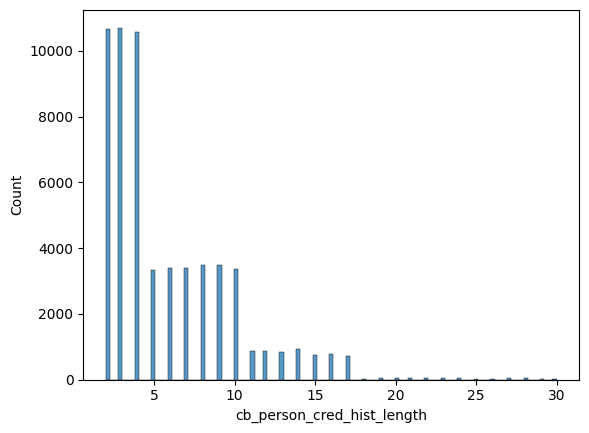


 loan_status
loan_status
0    50295
1     8350
Name: count, dtype: int64


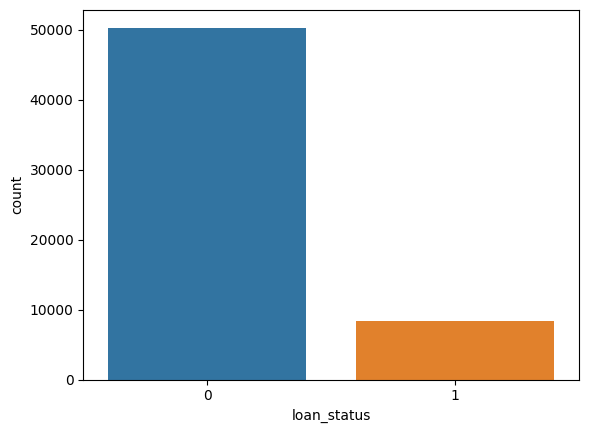

In [16]:
categorical_features = []
continuous_features = []
for feature in train_df.columns:
    print('\n',feature)
    print(train_df[feature].value_counts().sort_index() )
    if(len(train_df[feature].value_counts())<=10):
        sns.countplot(data=train_df, x=feature)
        plt.show()
        categorical_features.append(feature)
    else:
        sns.histplot(train_df[feature])
        plt.show()
        continuous_features.append(feature)

In [18]:
print('categorical_features', categorical_features)
print('\ncontinuous_features',continuous_features)

categorical_features ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status']

continuous_features ['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [45]:
loan_corr = train_df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length','loan_status']].corr()

In [41]:
loan_corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130
person_income,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956
person_emp_length,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428
loan_amnt,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982
loan_int_rate,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948
loan_percent_income,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280
cb_person_cred_hist_length,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030
loan_status,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000


<Axes: >

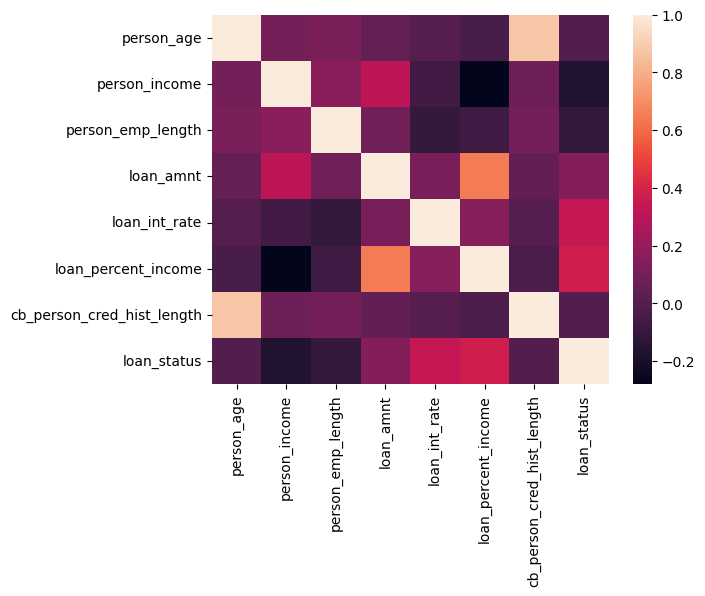

In [46]:
sns.heatmap(loan_corr)

In [47]:
def corr_by_threshold(data1, pos, neg):
    data = data1[:]
    # Iterate row by row and column by column, modifying values
    for index, row in data.iterrows():
        for col, value in row.items():
            # Modify values based on conditions or other logic
            if (value > pos) or (value < neg):
                _
            else:
                data.at[index, col] = 0  
    return data

masked_loan_corr = corr_by_threshold(loan_corr,0.7,-0.7)
masked_loan_corr
    


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.00000,0.0,0.0,0.0,0.0,0.0,0.87426,0.0
person_income,0.00000,1.0,0.0,0.0,0.0,0.0,0.00000,0.0
person_emp_length,0.00000,0.0,1.0,0.0,0.0,0.0,0.00000,0.0
loan_amnt,0.00000,0.0,0.0,1.0,0.0,0.0,0.00000,0.0
loan_int_rate,0.00000,0.0,0.0,0.0,1.0,0.0,0.00000,0.0
loan_percent_income,0.00000,0.0,0.0,0.0,0.0,1.0,0.00000,0.0
cb_person_cred_hist_length,0.87426,0.0,0.0,0.0,0.0,0.0,1.00000,0.0
loan_status,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,1.0


<Axes: >

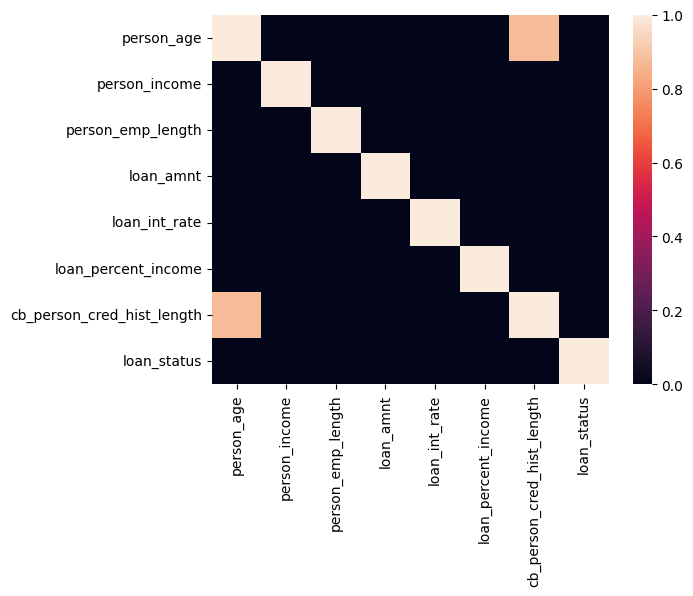

In [48]:
sns.heatmap(masked_loan_corr)

In [49]:
train_df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

## Preparing Modeling Data

In [50]:
Predictors = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file','person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
target = [ 'loan_status']

In [57]:
dummy_reqd = []
for feature in Predictors:
    print(feature,train_df[feature].dtype)
    if(train_df[feature].dtype == 'object'):
        dummy_reqd.append(feature)
dummy_reqd

person_home_ownership object
loan_intent object
loan_grade object
cb_person_default_on_file object
person_age int64
person_income int64
person_emp_length float64
loan_amnt int64
loan_int_rate float64
loan_percent_income float64
cb_person_cred_hist_length int64


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [58]:
train_cat_one_hot = pd.get_dummies(train_df[dummy_reqd])

In [114]:
test_cat_one_hot = pd.get_dummies(test_df[dummy_reqd])

In [59]:
train_cat_one_hot

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
58641,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
58642,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
58643,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False


In [62]:
train_df_1 = pd.concat([train_df,train_cat_one_hot],axis = 1)

In [115]:
test_df_1 = pd.concat([test_df,test_cat_one_hot],axis = 1)

In [63]:
train_df_1

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,...,False,False,True,False,False,False,False,False,True,False
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,...,False,False,False,True,False,False,False,False,True,False
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,...,False,True,False,False,False,False,False,False,True,False
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,...,True,False,True,False,False,False,False,False,True,False
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,...,False,False,False,False,True,False,False,False,False,True
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,...,False,False,False,True,False,False,False,False,True,False
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,...,False,False,False,False,True,False,False,False,True,False
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,...,False,True,False,False,False,False,False,False,True,False


In [66]:
new_predictors = [feature for feature in train_df_1.columns if train_df_1[feature].dtype!='object']


In [70]:
new_predictors.remove('id')


ValueError: list.remove(x): x not in list

In [71]:
new_predictors

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_status',
 'person_home_ownership_MORTGAGE',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE',
 'loan_grade_A',
 'loan_grade_B',
 'loan_grade_C',
 'loan_grade_D',
 'loan_grade_E',
 'loan_grade_F',
 'loan_grade_G',
 'cb_person_default_on_file_N',
 'cb_person_default_on_file_Y']

In [84]:
train_df_1_corr = train_df_1[new_predictors].corr()

In [85]:
train_df_1_corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
person_age,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130,0.049021,-0.002834,...,-0.012106,-0.006970,-0.005142,0.001083,0.012138,0.009546,0.013077,0.002839,-0.004408,0.004408
person_income,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956,0.282704,0.003164,...,0.007473,0.041488,0.015667,-0.036753,-0.042052,-0.006213,-0.004014,-0.008198,0.035514,-0.035514
person_emp_length,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428,0.283601,-0.001260,...,0.017467,0.093076,-0.013930,-0.071717,-0.026486,-0.016304,-0.003289,-0.010375,0.054467,-0.054467
loan_amnt,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982,0.114828,0.005683,...,0.003692,-0.103366,0.053154,-0.017970,0.071814,0.070362,0.032804,0.014251,-0.020271,0.020271
loan_int_rate,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948,-0.203106,0.011350,...,-0.010992,-0.822212,0.085884,0.449381,0.477286,0.272635,0.131935,0.075451,-0.501841,0.501841
loan_percent_income,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280,-0.161793,0.002283,...,0.000417,-0.129717,0.036974,0.014581,0.095733,0.072407,0.039430,0.027566,-0.042979,0.042979
cb_person_cred_hist_length,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030,0.043421,-0.001675,...,-0.009544,-0.004659,-0.007549,0.007694,0.005236,0.006090,0.010322,0.001812,-0.004886,0.004886
loan_status,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000,-0.202613,0.002918,...,-0.064378,-0.199089,-0.083765,-0.009654,0.395646,0.182878,0.067644,0.045889,-0.186962,0.186962
person_home_ownership_MORTGAGE,0.049021,0.282704,0.283601,0.114828,-0.203106,-0.161793,0.043421,-0.202613,1.000000,-0.033400,...,0.000222,0.193860,-0.054068,-0.105998,-0.076737,-0.026833,-0.009646,-0.011597,0.099172,-0.099172
person_home_ownership_OTHER,-0.002834,0.003164,-0.001260,0.005683,0.011350,0.002283,-0.001675,0.002918,-0.033400,1.000000,...,0.007925,-0.009911,0.008315,-0.000839,0.003691,-0.001790,-0.001968,0.017546,-0.002210,0.002210


<Axes: >

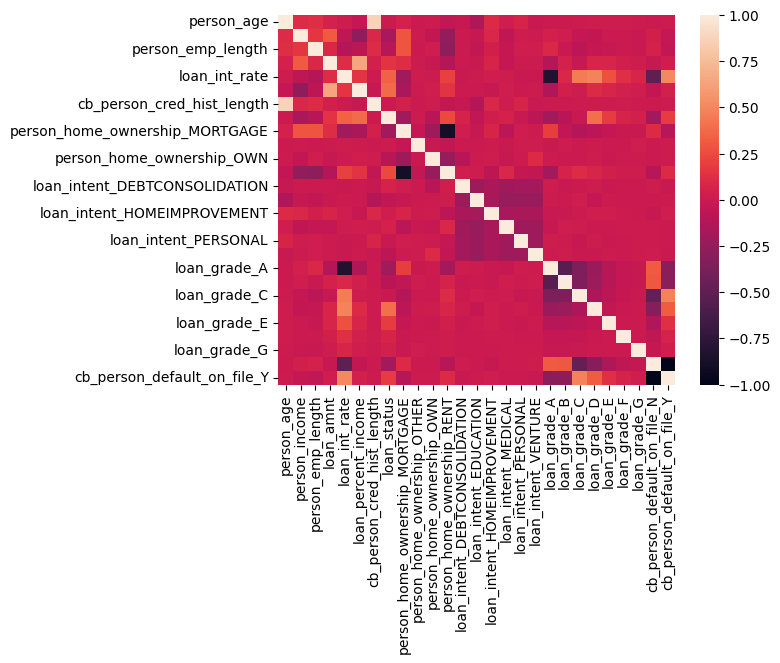

In [79]:
sns.heatmap(train_df_1_corr)

In [86]:
train_df_1_corr_thr = corr_by_threshold(train_df_1_corr,0.5,-0.5)
train_df_1_corr_thr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
person_age,1.00000,0.0,0.0,0.000000,0.000000,0.000000,0.87426,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
person_income,0.00000,1.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
person_emp_length,0.00000,0.0,1.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
loan_amnt,0.00000,0.0,0.0,1.000000,0.000000,0.647266,0.00000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
loan_int_rate,0.00000,0.0,0.0,0.000000,1.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.0,-0.822212,0.000000,0.0,0.0,0.0,0.0,0.0,-0.501841,0.501841
loan_percent_income,0.00000,0.0,0.0,0.647266,0.000000,1.000000,0.00000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
cb_person_cred_hist_length,0.87426,0.0,0.0,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
loan_status,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
person_home_ownership_MORTGAGE,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,1.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
person_home_ownership_OTHER,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,1.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


<Axes: >

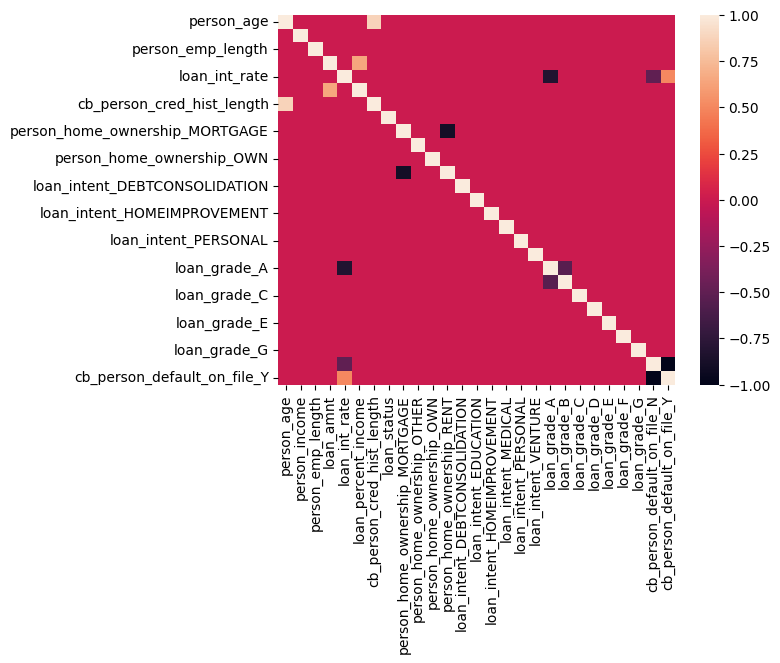

In [87]:
sns.heatmap(train_df_1_corr_thr)

In [92]:
def get_correlated_pair(data1):
    correlated_pairs = []
    data = data1[:]
    # Iterate row by row and column by column, modifying values
    for index, row in data.iterrows():
        for col, value in row.items():
            # Modify values based on conditions or other logic
            if (value > 0 or value < 0 )and index!=col:
                correlated_pairs.append((index,col))
 
    return correlated_pairs

In [93]:
get_correlated_pair(train_df_1_corr_thr)

[('person_age', 'cb_person_cred_hist_length'),
 ('loan_amnt', 'loan_percent_income'),
 ('loan_int_rate', 'loan_grade_A'),
 ('loan_int_rate', 'cb_person_default_on_file_N'),
 ('loan_int_rate', 'cb_person_default_on_file_Y'),
 ('loan_percent_income', 'loan_amnt'),
 ('cb_person_cred_hist_length', 'person_age'),
 ('person_home_ownership_MORTGAGE', 'person_home_ownership_RENT'),
 ('person_home_ownership_RENT', 'person_home_ownership_MORTGAGE'),
 ('loan_grade_A', 'loan_int_rate'),
 ('loan_grade_A', 'loan_grade_B'),
 ('loan_grade_B', 'loan_grade_A'),
 ('cb_person_default_on_file_N', 'loan_int_rate'),
 ('cb_person_default_on_file_N', 'cb_person_default_on_file_Y'),
 ('cb_person_default_on_file_Y', 'loan_int_rate'),
 ('cb_person_default_on_file_Y', 'cb_person_default_on_file_N')]

In [96]:
to_drop = ['person_age','loan_percent_income','loan_int_rate','person_home_ownership_RENT','loan_grade_A','cb_person_default_on_file_N',]

In [97]:
train_df_1.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y'],
      dtype='object')

In [101]:
train_df_final = train_df_1.drop(to_drop+['id'],axis=1)

In [102]:
train_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_income                   58645 non-null  int64  
 1   person_home_ownership           58645 non-null  object 
 2   person_emp_length               58645 non-null  float64
 3   loan_intent                     58645 non-null  object 
 4   loan_grade                      58645 non-null  object 
 5   loan_amnt                       58645 non-null  int64  
 6   cb_person_default_on_file       58645 non-null  object 
 7   cb_person_cred_hist_length      58645 non-null  int64  
 8   loan_status                     58645 non-null  int64  
 9   person_home_ownership_MORTGAGE  58645 non-null  bool   
 10  person_home_ownership_OTHER     58645 non-null  bool   
 11  person_home_ownership_OWN       58645 non-null  bool   
 12  loan_intent_DEBTCONSOLIDATION   

In [119]:
X_train_final = train_df_final.drop(['loan_status'],axis=1)
Y_train_final = train_df_final['loan_status'].values

In [120]:
objectDrop = [feature for feature in X_train_final.columns if X_train_final[feature].dtype == 'object']

In [121]:
X_train_final = X_train_final.drop(objectDrop,axis=1)

In [122]:
X_train_final.columns

Index(['person_income', 'person_emp_length', 'loan_amnt',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

In [130]:
test_df_1.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

## Modelling

In [123]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

In [129]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a DMatrix object from your data
dtrain = xgb.DMatrix(X_train_final, label=Y_train_final)
dtest = xgb.DMatrix(test_df_1[X_train_final.columns])

# Prepare the train and valid datasets
# dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
# dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
# dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dtest, 'test')]

# Set parameters (adjusting class weights for imbalance)
params = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 5,
    'eta': 0.1,
    'eval_metric': 'auc',  # Area Under the Curve for evaluation
    'scale_pos_weight': 6,  # Adjust weight for the minority class (adjust as needed)
    'n_estimators': 100,
    'random_state' : 42
}

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result


model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)




[0]	train-auc:0.88532	test-auc:nan
[50]	train-auc:0.94333	test-auc:nan


In [134]:

# Make predictions
y_pred = model.predict(dtest)

In [136]:
y_pred

array([0.95438576, 0.18814287, 0.7875778 , ..., 0.10046778, 0.73776567,
       0.94172853], dtype=float32)

In [140]:
y_pred_df = pd.DataFrame([y_pred])

In [143]:
y_pred_df = y_pred_df.T

In [144]:
y_pred_df

,0
0,0.954386
1,0.188143
2,0.787578
3,0.136710
4,0.417757
...,...
39093,0.359196
39094,0.130714
39095,0.100468
39096,0.737766


In [149]:
final_pred = pd.concat([test_df_1,y_pred_df],axis=1)
final_pred

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,...,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,0
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,...,False,False,False,False,False,True,False,True,False,0.954386
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,...,False,False,True,False,False,False,False,False,True,0.188143
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,...,False,False,False,False,True,False,False,False,True,0.787578
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,...,True,False,False,False,False,False,False,True,False,0.136710
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,...,False,False,False,True,False,False,False,False,True,0.417757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,...,False,True,False,False,False,False,False,True,False,0.359196
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,...,True,False,False,False,False,False,False,True,False,0.130714
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,...,True,False,False,False,False,False,False,True,False,0.100468
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,...,False,False,False,True,False,False,False,False,True,0.737766


In [151]:
final_pred.columns

Index([                            'id',                     'person_age',
                        'person_income',          'person_home_ownership',
                    'person_emp_length',                    'loan_intent',
                           'loan_grade',                      'loan_amnt',
                        'loan_int_rate',            'loan_percent_income',
            'cb_person_default_on_file',     'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE',    'person_home_ownership_OTHER',
            'person_home_ownership_OWN',     'person_home_ownership_RENT',
        'loan_intent_DEBTCONSOLIDATION',          'loan_intent_EDUCATION',
          'loan_intent_HOMEIMPROVEMENT',            'loan_intent_MEDICAL',
                 'loan_intent_PERSONAL',            'loan_intent_VENTURE',
                         'loan_grade_A',                   'loan_grade_B',
                         'loan_grade_C',                   'loan_grade_D',
                         

In [152]:
submdf = final_pred[['id',0]]

In [156]:
submdf_1 = submdf.rename({0:"loan_status"},axis=1)

In [157]:
submdf_1

,id,loan_status
0,58645,0.954386
1,58646,0.188143
2,58647,0.787578
3,58648,0.136710
4,58649,0.417757
...,...,...
39093,97738,0.359196
39094,97739,0.130714
39095,97740,0.100468
39096,97741,0.737766


In [158]:
submdf_1.to_csv('submission.csv', index=False)